K-Medoid

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

Reading Data Set which is named as BR_mod.csv

In [13]:
dataset = pd.read_csv("BR_mod.csv")

Using fillna function of pandas for filling missing values. ffill for Forward filling and bfill for Backward filling

In [14]:
dataset.fillna(method='ffill',limit=54,inplace= True)
dataset.fillna(method='bfill',limit=54,inplace= True)
dataset.fillna(method='ffill',limit=54,inplace= True)
dataset.fillna(method='bfill',limit=54,inplace= True)

Checking number of null values in after filling.

In [15]:
dataset.isnull().sum().sum()

0

Here, I am using PCA(principal component analysis) for dimensionality reduction for proper visualization

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset)
df = pd.DataFrame(data = principalComponents , columns = ['x', 'y'])

I am using euclidean distance formula for distance calculation betwwen medoid and non-medoid.

In [17]:
def euclidean_distance(x1, x2):
    dist = np.sqrt(np.sum(x1-x2)**2) 
    return dist

Selection of medoid randomly from Data points. If cost 1 is less than than the cost 2 , we wiil proceed with the medoids that we have selected in starting. Otherwise we will select that non-medoid points in place of initial randomly selected medoid.

In [18]:
class KMedoid:
    def __init__(self, K = 5, max_iters = 100, plot = False ):
        self.K = K 
        self.max_iters = max_iters 
        self.plot = plot  
        self.clust = [[] for _ in range(self.K)]
        self.centr = []

    def forward(self, x, error = 0):
        self.data = x 
        self.n_samples, self.n_features = self.data.shape

        random_id = np.random.choice(self.n_samples, self.K, replace = False)     #randomly choosing initial medo 
        self.centr = [self.data[x] for x in random_id] 
        for _ in range(self.max_iters): 
            self.clust, self.cost = self._compute_clust(self.centr)     #computing clust and cost
            
            if self.plot:
                self.to_plot() 
            
            centr_old = self.centr 
            cost_1 = self.cost
            old_clust = self.clust 

            self.centr = self._cal_medo()                             #choosing new medoid 

            self.clust , self.cost = self._compute_clust(self.centr)     #calculating new clust and new cost
            
            if(self.cost > cost_1):
                self.centr = centr_old 
                self.cost = cost_1
                self.clust = old_clust
        
            if self.plot:
                self.to_plot()

        return self.clust
    
    def _predict(self, clust):
        labels = np.empty(self.n_samples)
        for clust_x, clust in  enumerate(clust):
            for x in clust:
                labels[x] = clust_x
        return labels

    def _compute_clust(self, centr):
        clust = [[] for _ in range(self.K)]
        cost = [0 for _ in range(self.K)]
        for x, sample in enumerate(self.data):
            distances = [euclidean_distance(sample, point) for point in centr]      #choosing clust based on min euclidean distance
            closest_centroid = np.argmin(distances)
            clust[closest_centroid].append(x)
            cost[closest_centroid] += distances[closest_centroid]            #cost is the sum of medoid distance from points in clust
        return clust, sum(cost)

    def _cal_centr(self, clust):
        centr = np.zeros((self.K, self.n_features))
        for clust_x, clust in enumerate(clust):                     
            centr[clust_x] = np.mean(self.data[clust], axis = 0)
        return centr

    def _cal_medo(self):
        random_id = np.random.choice(self.n_samples, self.K, replace = False)      #choosing new medo
        centr = [self.data[x] for x in random_id]      
        return centr

    def to_plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clust):
            point = self.data[index].T[:2, :]
            ax.scatter(*point)

        for i,index in enumerate(self.centr):
            point = self.centr[i][:2]
            ax.scatter(*point, marker="^", color='black',s=100, linewidth=1)
        plt.xlabel('x_component')
        plt.ylabel('y_component')
        plt.title('K-Medoid')
        plt.show()


Summary for the given dataset using K -Medoids Clustering are as follows :
Number of points in cluster  0 :  265
Number of points in cluster  1 :  449
Number of points in cluster  2 :  383
Total number of data points in all clusters = 1097


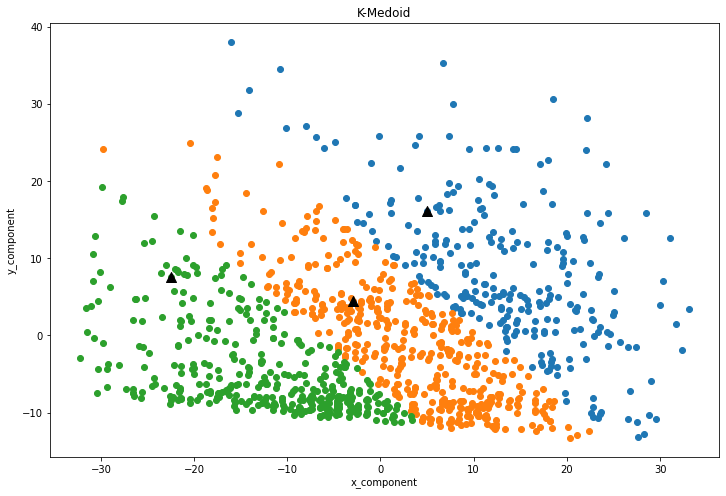

In [8]:
print("Summary for the given dataset using K - Medoids Clustering are as follows :")
model = KMedoid(K=3, max_iters=100)
y_predict = model.forward(df.to_numpy())
s=0
for i, ls in enumerate(y_predict):
    print("Number of points in cluster ", i, ": ", len(ls))
    s+=len(ls)
print('Total number of data points in all clusters = %d' %s)
model.to_plot()